In [1]:
import tensorflow as tf
from tensorflow.keras import layers, utils
from tensorflow.keras.datasets import mnist
from tensorflow.keras.callbacks import EarlyStopping 

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [3]:
print("x_train.shape = ", x_train.shape)
print("y_train.shape = ", y_train.shape)
print("x_test.shape = ", x_test.shape)
print("y_test.shape = ", y_test.shape)

x_train.shape =  (60000, 28, 28)
y_train.shape =  (60000,)
x_test.shape =  (10000, 28, 28)
y_test.shape =  (10000,)


In [4]:
print("y_train[0:10] = ", y_train[0:10])
print("x_train[0] = ", x_train[0])

y_train[0:10] =  [5 0 4 1 9 2 1 3 1 4]
x_train[0] =  [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0  

In [5]:
from matplotlib import pyplot as plt
import numpy as np

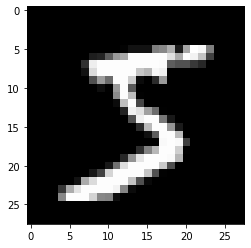

In [7]:
first_image = x_train[0]
first_image = np.array(first_image, dtype = 'float')
pixels = first_image.reshape((28, 28))
plt.imshow(pixels, cmap = 'gray')
plt.show()

In [8]:
# DNN을 위한 X변수의 데이터 변환
# 28*28 텐서를 길이가 784인 벡터로 변환
x_train = x_train.reshape(60000, 784).astype('float32')
x_test = x_test.reshape(10000, 784).astype('float32')

# 0-1 noramalization
x_train /= 255
x_test /= 255

# DNN을 위한 Y변수의 범주형 데이터(0 ~ 9)로 변환 -> one-hot encoding
y_train = utils.to_categorical(y_train, 10)
y_test = utils.to_categorical(y_test, 10)

In [9]:
print(list(y_train)[0:3])
print(x_train[0].shape)

[array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32), array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32), array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)]
(784,)


In [10]:
model = tf.keras.Sequential()
model.add(layers.Dense(512, input_shape = (784,)))
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.2))

model.add(layers.Dense(512))
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.2))

model.add(layers.Dense(10))
model.add(layers.Activation('softmax'))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 activation (Activation)     (None, 512)               0         
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 activation_1 (Activation)   (None, 512)               0         
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                5

In [12]:
model.compile(loss = 'categorical_crossentropy',
             optimizer = 'Adam',
             metrics = ['accuracy'])

early_stop = EarlyStopping(monitor = 'val_loss', patience = 10)
hist = model.fit(x_train, y_train,
                batch_size = 100, epochs = 50,
                validation_split = 0.2, callbacks = [early_stop],
                shuffle = True, verbose = 1)

Epoch 1/50
480/480 [==============================] - 9s 17ms/step - loss: 0.2613 - accuracy: 0.9207 - val_loss: 0.1100 - val_accuracy: 0.9662
Epoch 2/50
480/480 [==============================] - 8s 16ms/step - loss: 0.1072 - accuracy: 0.9662 - val_loss: 0.0904 - val_accuracy: 0.9723
Epoch 3/50
480/480 [==============================] - 8s 16ms/step - loss: 0.0745 - accuracy: 0.9753 - val_loss: 0.1110 - val_accuracy: 0.9651
Epoch 4/50
480/480 [==============================] - 8s 16ms/step - loss: 0.0598 - accuracy: 0.9808 - val_loss: 0.0854 - val_accuracy: 0.9753
Epoch 5/50
480/480 [==============================] - 8s 16ms/step - loss: 0.0487 - accuracy: 0.9841 - val_loss: 0.0796 - val_accuracy: 0.9772
Epoch 6/50
480/480 [==============================] - 8s 16ms/step - loss: 0.0419 - accuracy: 0.9861 - val_loss: 0.0708 - val_accuracy: 0.9799
Epoch 7/50
480/480 [==============================] - 8s 16ms/step - loss: 0.0340 - accuracy: 0.9883 - val_loss: 0.0814 - val_accuracy: 0.9783

In [13]:
import matplotlib.pyplot as plt

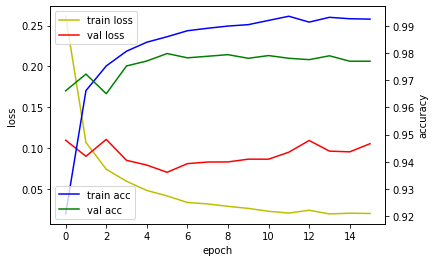

In [14]:
fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label = 'train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label = 'val loss') # val loss가 최소인 지점에서 early stopping
acc_ax.plot(hist.history['accuracy'], 'b', label = 'train acc')
acc_ax.plot(hist.history['val_accuracy'], 'g', label = 'val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')
loss_ax.legend(loc = 'upper left')
acc_ax.legend(loc = 'lower left')

plt.show()

In [15]:
# model evaluate
score = model.evaluate(x_test, y_test, verbose = 1)
print('test_loss : ', score[0])
print('test_acc : ', score[1])

313/313 [==============================] - 2s 7ms/step - loss: 0.0912 - accuracy: 0.9815
test_loss :  0.0912306010723114
test_acc :  0.9815000295639038
